# Alogritmo Imunológico (CLONALG) - Classificador de flores do tipo Iris

In [ ]:
# Célula de Imports

from sklearn.datasets import load_iris
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import random 
import matplotlib.pyplot as plt

In [2]:
# Carrega o data set
data = load_iris()

# Atribui valores à entrada e à saída 
X = data.data
y = data.target

In [3]:
# Separando dados para treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Dados para treinamento: {len(X_train)}\nDados para teste: {len(X_test)}')

Dados para treinamento: 120
Dados para teste: 30


### PARÂMETROS GLOBAIS

In [4]:
CLASS_NUM = 3
POPULATION_SIZE = 60
SELECTION_RATE = 0.2 # 20%
MUTATION_RATE = 0.1
MUTATION_DEVIATION = 0.1
REPLACEMENT_RATE = 0.1
NUM_OF_GENERATIONS = 50


### GERAÇÃO DA POPULAÇÃO DE ANTICORPOS

In [5]:
# Classe Anticorpo

class Antibody:
    def __init__(self, vector, label):
        self.vectors = vector
        self.labels = label

In [6]:
# Classe Antígeno

class Antigen:
    def __init__(self, vector, label):
        self.vector = vector
        self.label = label

Para a geração da população, iremos escolher aleatoriamente os valores dos vetores, dentro de um limite estimado pelo menor e maior valor de cada coluna do dataset.

Por fim, iremos atribuir igualmente aos N vetores, as N labels das N classes existentes no antígeno

In [7]:
# Extraindo o valor minimo e máximo de cada atributo da Iris

min_sepal_length = min(X_train[:, 0])
max_sepal_length = max(X_train[:, 0])

min_sepal_width = min(X_train[:, 1])
max_sepal_width = max(X_train[:, 1])

min_petal_length = min(X_train[:, 2])
max_petal_length = max(X_train[:, 2])

min_petal_width = min(X_train[:, 3])
max_petal_width = max(X_train[:, 3])

# Salvando os limites inferiores e superiores em uma lista
min_bounds = [min_sepal_length, min_sepal_width, min_petal_length, min_petal_width]
max_bounds = [max_sepal_length, max_sepal_width, max_petal_length, max_petal_width]

print(f'Limite do comprimento da sépala: [{min_sepal_length}, {max_sepal_length}]\nLimite da largura da sépala: [{min_sepal_width}, {max_sepal_width}]\nLimite do comprimento da pétala: [{min_petal_length}, {max_petal_length}]\nLimite da largura da sépala: [{min_petal_width}, {max_petal_width}]\n')

Limite do comprimento da sépala: [4.3, 7.7]
Limite da largura da sépala: [2.0, 4.4]
Limite do comprimento da pétala: [1.0, 6.7]
Limite da largura da sépala: [0.1, 2.5]



In [8]:
# Função para gerar um anticorpo

def generateAntibody():

    # Cria um vetor para as labels com base no numero de classes
    labels = []
    for i in range(CLASS_NUM):
        labels.append(i)

    # Realiza um shuffle no vetor
    random.shuffle(labels)

    # Escolhe um valor aleatorio dentro da faixa estimada para cada um dos CLASS_NUM vetores
    vectors = []

    for i in range (CLASS_NUM):
        vector = []
        vector = [
            random.uniform(min_sepal_length, max_sepal_length),
            random.uniform(min_sepal_width, max_sepal_width),
            random.uniform(min_petal_length, max_sepal_length),
            random.uniform(min_petal_width, max_petal_width)
        ]
        vectors.append(vector)
    
    # Retorna a classe de anticorpo
    antibody = Antibody(vectors, labels)
    return antibody

In [9]:
# Função para criar a população com base no seu tamanho e numero de classes

def generatePopulation():

    population = []

    for i in range(POPULATION_SIZE):
        population.append(generateAntibody())
    
    return population

### Avaliação do Fitness

In [10]:
# Função para a avaliação do fitness em relação aos antígenos
# Dentre os tres vetores presentes no anticorpo, seleciona aquele com a menor distancia para o determinado antígeno
# Para o vetor escolhido avalia se possui a mesma label que o antigeno, se sim, ele pontua
# O maior fitness possível será igual a 1 (100% de acerto para todos os antigenos)

def evaluateFitness(antibody, antigens):
    
    # Pontos a serem somados caso o vetor tenha a mesma label que o antígeno
    points = 0

    for antigen in antigens:

        distances = []
        for i in range(len(antibody.vectors)): 
    
            """
            Utiliza-se o calcúlo do inverso da distância Euclidiana
            para avaliar o vetor com menor distancia

            1/Distancia(anticorpo, antigeno)
            """
            # Método do NumPy que calcula a distância euclidiana entre dois pontos
            distance = np.linalg.norm(np.array(antibody.vectors[i]) - np.array(antigen.vector))
            distances.append(distance)
        
        # Seleciona o indice do vetor com a menor distancia do antigeno
        min_index = distances.index(min(distances))

        # Compara se esse vetor possui a mesma label que o antigeno
        if(antibody.labels[min_index] == antigen.label):
            points+= 1
    
    return points/len(antigens)


In [11]:
# Célula para realização de teste
pop = generatePopulation() # Gera uma população

# Cria a classe de antígenos
antigens = []

for i in range(len(X_train)):
    antigens.append(Antigen(X_train[i], y_train[i])) # Pega o antigeno i

# Realiza a avaliação de cada anticorpo da população
for i, antibody in enumerate(pop):
    print(f'Anticorpo {i + 1} : Nota = {evaluateFitness(antibody, antigens)}\nVetores: {antibody.vectors}\n')

Anticorpo 1 : Nota = 0.075
Vetores: [[5.021659149914483, 3.2345111198155068, 1.179779311778076, 2.4251627564845815], [5.689602871371388, 3.6623752830726986, 5.152046722904018, 1.8605287421333978], [6.647521887736502, 3.4472224276969885, 2.6986408112122016, 1.248315852004352]]

Anticorpo 2 : Nota = 0.25833333333333336
Vetores: [[5.638053449317409, 2.8707293811117682, 4.978754972423372, 1.9626751585814137], [7.469253408378506, 4.114758237589287, 7.503027933862383, 1.199994384544788], [4.502715626740003, 3.2680616242881255, 6.413589812166272, 0.23822786787213043]]

Anticorpo 3 : Nota = 0.4583333333333333
Vetores: [[5.285482820117774, 2.616396443351346, 6.310826061776563, 2.3383089240153607], [5.669689897395824, 3.7715671776876007, 3.180832394642659, 1.2416683989439028], [6.435234792222417, 3.382393559501118, 5.448689003628131, 1.1600854614171376]]

Anticorpo 4 : Nota = 0.0
Vetores: [[6.41978650118846, 2.8025057157597932, 1.349128939619799, 0.1930096146239505], [5.5716290530487775, 2.99921

### Seleção dos N melhores anticorpos

In [12]:
# Função para realizar a seleção

def selectBestFitness(evaluated_antibodies):
    # Ordena a lista do menor para o maior fitness
    ordered_list = sorted(evaluated_antibodies, key=lambda x : x[0], reverse=True)

    # Determina a quantidade de melhores com base no SELECTION RATE
    best_qtd = int(POPULATION_SIZE * SELECTION_RATE)
    # Seleciona essa quantidade na lista
    bests = ordered_list[:best_qtd]
    return bests # Retorna a parcela da lista selectionada

In [13]:
# Célula para realização de teste

# Lista com os anticorpos e seus respectivos fitness
evaluated_antibodies = []

for antibody in pop:
    evaluated_antibody = []
    # Avalia o fitness de cada anticorpo e adiciona em X[0]
    evaluated_antibody.append(evaluateFitness(antibody, antigens))
    # Adiciona o anticorpo em X[1]
    evaluated_antibody.append(antibody)
    # Adiciona a lista com o anticorpo e seu fitness
    evaluated_antibodies.append(evaluated_antibody)

# Resgata os N melhores fitness
bests = selectBestFitness(evaluated_antibodies)

#Imprime os melhores anticorpos
for i ,antibody in enumerate(bests):
    print(f'Anticorpo {i + 1} : {antibody[0]}')

Anticorpo 1 : 0.875
Anticorpo 2 : 0.825
Anticorpo 3 : 0.75
Anticorpo 4 : 0.6583333333333333
Anticorpo 5 : 0.6583333333333333
Anticorpo 6 : 0.65
Anticorpo 7 : 0.6416666666666667
Anticorpo 8 : 0.6416666666666667
Anticorpo 9 : 0.6416666666666667
Anticorpo 10 : 0.6333333333333333
Anticorpo 11 : 0.55
Anticorpo 12 : 0.5166666666666667


### Clonagem dos anticorpos mais promissores

Para a etapa de clonagem, utilizamos o seguinte equação para definir quantos clones cada fitness irá receber:

$$
QC^i_k = \left( \frac{af^i_k}{\sum_{k=1}^{n} af^i_k} \right) \cdot Cl
$$

Onde:
- `QC^i_k`: Quantidade de clones gerados para o anticorpo *k* na iteração *i*
- `af^i_k`: Afinidade do anticorpo *k* na iteração *i*
- `Cl`: Quantidade total de clones a serem distribuídos
- `n`: Número total de anticorpos selecionados

In [14]:
# Função para realizar a clonagem

def makeClones(bests):

    # Lista final para armazenar os clone
    clones = []

    # Define o numero total de clone
    total_clones = POPULATION_SIZE - len(bests)

    # Somatorio de afinidades
    fitness = [x[0] for x in bests] # cria lista de afinidades
    fitness_sum = sum(fitness) # Soma total das afinidades

    # Lista temporária para armazenar as classes de anticorpos
    antibodies = [x[1] for x in bests] # cria uma lista de anticorpos

    # Calcula a quantidade de clones para cada fitness e armazena em uma lista
    qtd_clones = [round((c/fitness_sum) * total_clones) for c in fitness]

    # Realiza a clonagem ideal para cada fitness e armazena na lista final de clones
    counter = 0
    while counter < len(qtd_clones):
        for _ in range(qtd_clones[counter]):
            # Lista que armazena a classe do anticorpo e seu fitness
            pair = []
            pair.append(fitness[counter])
            pair.append(antibodies[counter])
            # Salva na lista final
            clones.append(pair)
        counter += 1
    
    # Retorna o total de clones
    return clones

In [15]:
# Célula para a realização de teste
clones = makeClones(bests)
counter = 0

for i, clone in enumerate(clones):
    print(f'Clone {i + 1}: {clone[0]}')
    counter+= 1
    

print(f'Total de clones gerados: {counter}')

Clone 1: 0.875
Clone 2: 0.875
Clone 3: 0.875
Clone 4: 0.875
Clone 5: 0.875
Clone 6: 0.825
Clone 7: 0.825
Clone 8: 0.825
Clone 9: 0.825
Clone 10: 0.825
Clone 11: 0.75
Clone 12: 0.75
Clone 13: 0.75
Clone 14: 0.75
Clone 15: 0.6583333333333333
Clone 16: 0.6583333333333333
Clone 17: 0.6583333333333333
Clone 18: 0.6583333333333333
Clone 19: 0.6583333333333333
Clone 20: 0.6583333333333333
Clone 21: 0.6583333333333333
Clone 22: 0.6583333333333333
Clone 23: 0.65
Clone 24: 0.65
Clone 25: 0.65
Clone 26: 0.65
Clone 27: 0.6416666666666667
Clone 28: 0.6416666666666667
Clone 29: 0.6416666666666667
Clone 30: 0.6416666666666667
Clone 31: 0.6416666666666667
Clone 32: 0.6416666666666667
Clone 33: 0.6416666666666667
Clone 34: 0.6416666666666667
Clone 35: 0.6416666666666667
Clone 36: 0.6416666666666667
Clone 37: 0.6416666666666667
Clone 38: 0.6416666666666667
Clone 39: 0.6333333333333333
Clone 40: 0.6333333333333333
Clone 41: 0.6333333333333333
Clone 42: 0.6333333333333333
Clone 43: 0.55
Clone 44: 0.55
Clo

### Hipermutação dos anticorpos de acordo com a afinidade

Para a hipermutação, utilizamos a seguinte equação que é inversamente proporcional ao fitness dos clones:

$$
hipAnt^i_k = \left( 1 - \left( \frac{afin^i_k}{maxAfin} \right) \right) \cdot \beta
$$

Where:

- ` hipAnt^i_k `: taxa de hipermitação do anticorpo `k` na iteração `i`  
- ` afin^i_k `: afinidade do anticorpo `k` na iteração`i`  
- ` \beta `: fator de mutação
- ` maxAfin `: melhor fitness da geração

De forma a alterar o vetor 4D de cada clone, iremos apicar o a **Mutação** **Gaussiana**, a qual adiciona ou remove um valor aleatório de cada posição do vetor com base no MUTATION_DEVIATION

In [ ]:
# Função que realizará a mutação dos clones e retornará os clones mutados, porém
# sem o fitness, o qual será recalculado na próxima etapa

def mutate(clones, best):
    mutated_clones = []
    # Seleciona todos os anticorpos presentes nos clones para serem mutados
    antibodies = [x[1] for x in clones]

    for i, antibody in enumerate(antibodies):
        afinity = clones[i][0] # Recupera a afinidade inicial do clone

        # Calcula a taxa de mutação para o clone especifico com base em sua afinidade
        hip_mutation_rate = (1 - (afinity/best)) * MUTATION_RATE

        # Inicializa lista que armazenará os vetores 4D mutados
        mutated_vectors = []

        # Para cada valor nos vetores 4D do clone, escolheremos aleatoriamente um valor
        # de mutação caso tenha acertado a probabilidade
        for j in range(len(antibody.vectors)):
            mutated_vector = []

            # Monta o j vetor mutado
            for x in range(len(antibody.vectors[j])):
                # Gera um número aleatório entre 0 e 1
                rand = random.random()
                if rand <= hip_mutation_rate: # Irá realizar a mutação
                    # Aplica a mutação Gaussiana
                    value = antibody.vectors[j][x] + np.random.normal(0, MUTATION_DEVIATION) 
                    # Clipa o valor nos limites inferiores e superiores
                    value = np.clip(value, min_bounds[x], max_bounds[x])
                else:
                    value = antibody.vectors[j][x]
                # Adiciona valor mutado    
                mutated_vector.append(value)
            # Adiciona o vetor mutado na lista de vetores
            mutated_vectors.append(mutated_vector)

        # Cria um novo anticorpo com base na mutação do clone
        mutated_clones.append(Antibody(mutated_vectors, antibody.labels))
    # Retorna uma lista com os novos objetos originários da mutação dos clones
    return mutated_clones
        


In [17]:
# Célula para realização de teste

mutated_clones = mutate(clones)

for i in range(len(mutated_clones)):
    print(f'CLONE {i + 1}')
    for j in range(len(mutated_clones[i].vectors)):
        print(f'Clone original: {clones[i][1].vectors[j]}\nClone mutado  : {mutated_clones[i].vectors[j]}\n')
    print('======================')

CLONE 1
Clone original: [5.8988351538974095, 4.198194965131572, 1.2452860188713433, 0.9870999152379341]
Clone mutado  : [5.945647254061061, 4.198194965131572, 1.2452860188713433, 0.9870999152379341]

Clone original: [6.57065566070524, 3.023137155418083, 5.5971190373461255, 2.3578135940762555]
Clone mutado  : [6.57065566070524, 3.0323343200573527, 5.5971190373461255, 2.3578135940762555]

Clone original: [6.103885042054415, 3.466892275810836, 5.377911969026277, 1.868126974931579]
Clone mutado  : [6.103885042054415, 3.466892275810836, 5.377911969026277, 1.868126974931579]

CLONE 2
Clone original: [5.8988351538974095, 4.198194965131572, 1.2452860188713433, 0.9870999152379341]
Clone mutado  : [5.8988351538974095, 4.198194965131572, 1.2452860188713433, 0.9870999152379341]

Clone original: [6.57065566070524, 3.023137155418083, 5.5971190373461255, 2.3578135940762555]
Clone mutado  : [6.57065566070524, 3.023137155418083, 5.5971190373461255, 2.3578135940762555]

Clone original: [6.10388504205441

### Metadinâmica

Nessa etapa, iremos juntar os clones mutados com a classe dos melhores fitness, que foram escolhidos anteriormente.
Para aumentar a diversidade e evitar que os valores não fiquem presos à um ótimo local, selecionaremos os N piores anticorpos e iremos substituí-los por N novos anticorpos gerados aleatoriamente

In [18]:
def replacement(bests, mutated_clones, antigens):

    # Avalia os clone mutados e salva em uma lista
    evaluated_mutated = [[evaluateFitness(clone, antigens), clone] for clone in mutated_clones]

    # Combina as duas listas para serem ordenadas
    combined_pool = bests + evaluated_mutated
    # Ordena a lista por valor de fitness em ordem decrescente
    ordered_pool = sorted(combined_pool, key=lambda x : x[0], reverse=True)

    # Calcula a quantidade de anticorpos para serem excluidos
    replacement_num = int(POPULATION_SIZE * REPLACEMENT_RATE)

    # Exclui a quantidade calculada
    list_to_keep = ordered_pool[:POPULATION_SIZE - replacement_num]
    # Extrai todos os anticorpos da lista mantida
    antibodies = [x[1] for x in list_to_keep]

    # Gera novos anticorpos aleatorios
    new_population = []

    for i in range(replacement_num):
        new_population.append(generateAntibody())

    return antibodies + new_population


In [19]:
# Célula para realização de teste

new_generation = replacement(bests, mutated_clones, antigens)

for i , antibody in enumerate(new_generation):
    print(f'ANTICORPO {i + 1}')
    for j in range(len(antibody.vectors)):
     print(f'Label: {antibody.labels[j]}\n Vector:  {antibody.vectors[j]}')
    print('==================')

ANTICORPO 1
Label: 0
 Vector:  [5.8988351538974095, 4.198194965131572, 1.2452860188713433, 0.9870999152379341]
Label: 2
 Vector:  [6.57065566070524, 3.023137155418083, 5.5971190373461255, 2.3578135940762555]
Label: 1
 Vector:  [6.103885042054415, 3.466892275810836, 5.377911969026277, 1.868126974931579]
ANTICORPO 2
Label: 0
 Vector:  [5.945647254061061, 4.198194965131572, 1.2452860188713433, 0.9870999152379341]
Label: 2
 Vector:  [6.57065566070524, 3.0323343200573527, 5.5971190373461255, 2.3578135940762555]
Label: 1
 Vector:  [6.103885042054415, 3.466892275810836, 5.377911969026277, 1.868126974931579]
ANTICORPO 3
Label: 0
 Vector:  [5.8988351538974095, 4.198194965131572, 1.2452860188713433, 0.9870999152379341]
Label: 2
 Vector:  [6.57065566070524, 3.023137155418083, 5.5971190373461255, 2.3578135940762555]
Label: 1
 Vector:  [6.103885042054415, 3.466892275810836, 5.377911969026277, 1.868126974931579]
ANTICORPO 4
Label: 0
 Vector:  [5.897606801786726, 4.198194965131572, 1.3342157273379582

### O ALGORITMO CLONALG

In [ ]:
def clonag(antigens):

    # Gera a população inicial
    population = generatePopulation()

    # Listas para salvar estatisticas sobre os fitness de cada geração
    best_fitness_per_generation = []
    worst_fitness_per_generation = []
    avg_fitness_per_generation = []
    

    for _ in range(NUM_OF_GENERATIONS):

        # PASSO 1 : AVALIAÇÃO 
        evaluated = []
        evaluated = [[evaluateFitness(antibody, antigens), antibody] for antibody in population]

        # Encontra o melhor fitness da atual geração, a média e o pior
        fitness_values = [ant[0] for ant in evaluated]
        best_fitness = max(fitness_values)
        worst_fitness = min(fitness_values)
        avg_fitness = sum(fitness_values)/ len(fitness_values) 

        # Salva esses valores
        best_fitness_per_generation.append(best_fitness)
        worst_fitness_per_generation.append(worst_fitness)
        avg_fitness_per_generation.append(avg_fitness)

        # PASSO 2 : SELECIONAR OS MELHORES
        bests = selectBestFitness(evaluated)
        
        # PASSO 3 : CLONAGEM
        clones = makeClones(bests, best_fitness)

        # PASSO 4: HIPERMUTAÇÃO
        mutated_clones = mutate(clones)

        # PASSO 5: METADINÂMICA
        population = replacement(bests, mutated_clones, antigens)

    # Realiza o ultimo treinamento de fitness
    evaluated = []
    evaluated = [[evaluateFitness(antibody, antigens), antibody] for antibody in population]

    # Retorna a população treinada e avaliada      
    return evaluated, best_fitness_per_generation, worst_fitness_per_generation, avg_fitness_per_generation


### REALIZANDO O TREINAMENTO

In [21]:
# Preparando os antígenos de treinamento

train_antigens = []

for i in range(len(X_train)):
    train_antigens.append(Antigen(X_train[i], y_train[i]))


In [22]:
# Realizando o treino
trained_population, best, worst, avg = clonag(train_antigens)

In [24]:
# Célula para printar a população final

for i, antibody in enumerate(trained_population):
    print(f'Anticorpo {i + 1}\nNota: {antibody[0]}')
    for j in range(len(antibody[1].vectors)):
        print(f'Label: {antibody[1].labels[j]}, {antibody[1].vectors[j]}')
    print('=============================')

Anticorpo 1
Nota: 0.9583333333333334
Label: 1, [6.863249801405075, 2.7595618441806318, 2.473827600572002, 1.0681430945842094]
Label: 0, [5.471043594043215, 3.928227897021061, 1.573973868398082, 1.8702651080395705]
Label: 2, [6.235492919885507, 4.072118569621901, 6.858167166120581, 1.1045532973738188]
Anticorpo 2
Nota: 0.9583333333333334
Label: 1, [6.863249801405075, 2.7595618441806318, 2.473827600572002, 1.0681430945842094]
Label: 0, [5.471043594043215, 3.928227897021061, 1.573973868398082, 1.8702651080395705]
Label: 2, [6.235492919885507, 4.072118569621901, 6.858167166120581, 1.1045532973738188]
Anticorpo 3
Nota: 0.9583333333333334
Label: 1, [6.863249801405075, 2.7595618441806318, 2.473827600572002, 1.0681430945842094]
Label: 0, [5.471043594043215, 3.928227897021061, 1.573973868398082, 1.8702651080395705]
Label: 2, [6.235492919885507, 4.072118569621901, 6.858167166120581, 1.1045532973738188]
Anticorpo 4
Nota: 0.9583333333333334
Label: 1, [6.863249801405075, 2.7595618441806318, 2.47382

In [28]:
# Função para gerar gráfico de avalição

def plotGraph(best_fitness, worst_fitness, avg_fitness):

    generations = list(range(len(avg_fitness)))
    avg = avg_fitness
    max_ = best_fitness
    min_ = worst_fitness

    plt.figure(figsize=(10, 6))

    # Plotando valor maximo
    plt.plot(generations, max_, 'r-*', label='Max')

    # Plotando valor minimo
    plt.plot(generations, min_, 'b-^', label='Min')

    # Plotando valor medio
    plt.plot(generations, avg, 'k->', label='Avg')


    plt.xlabel('Times')
    plt.ylabel('Function fitness')
    plt.title('Fitness over Generations')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

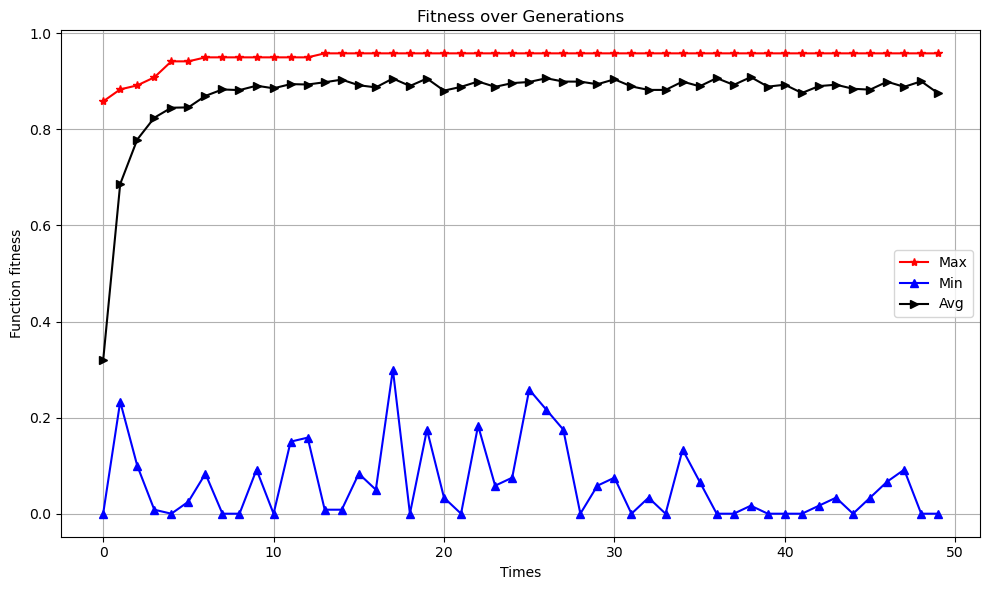

In [29]:
# Plota o grafico
plotGraph(best, worst, avg)

### REALIZANDO O TESTE

In [ ]:
# Função para prever qual dos vetores do anticorpo se aproxima mais do antígeno
# Logo em seguida, retorna a label do melhor

def predict(antigen, antibody):
    # Calcula a distância do antigeno para cada vetor
    distances = [np.linalg.norm(np.array(v) - np.array(antigen.vector)) for v in antibody.vectors]
    # Escolhe a menor distancia
    closest = distances.index(min(distances))
    # Retorna a label correspondente
    return antibody.labels[closest]

In [31]:
# Função para avaliar todos os antigenos com o anticorpo com melhor fitness
# Retorna a taxa de acertos e os vetores com as labels verdadeiras e as previstas

def evaluateAntibody(antigens, antibody):
    # Numero de acertos
    correct = 0
    predictions = [] # Lista com as previsões
    true_labels = [] # Lista com as respostas corretas

    # Avalia para cada antígeno
    for antigen in antigens:
        pred = predict(antigen, antibody) # Realiza a previsão
        predictions.append(pred) # Salva a previsão
        true_labels.append(antigen.label) # Salva a resposta correta
        # Caso a previsão esteja correta, pontua
        if pred == antigen.label:
            correct+= 1

    # Avalia a taxa de acertos
    accuracy = correct/len(antigens)
    # Retorna resultados
    return accuracy, true_labels, predictions 

In [32]:
# Celula para pegar o melhor anticorpo e preparar os antigenos

best = max(trained_population, key=lambda x: x[0])
_, best_antibody = best

# Instancia os antigenos da lista de testes

antigens_test = []

for i in range(len(X_test)):
    antigens_test.append(Antigen(X_test[i], y_test[i])) # Pega o antigeno i

In [38]:
# Realiza o teste, salva e printa os resultados

accuracy, true_labels, predictions = evaluateAntibody(antigens_test, best_antibody)
accuracy = round((accuracy*100), 2)

print(f'Taxa de acertos: {accuracy:.2f}%\nPrevisões: {predictions}\nRespostas: {true_labels}')

Taxa de acertos: 96.67%
Previsões: [1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0]
Respostas: [1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0]


#### ANÁLISE

In [42]:
# Função para plotar uma matriz de confusão

def confusionMatrix(true_labels, predictions, class_names):

    # Plota a matriz de confusão
    matrix = confusion_matrix(true_labels, predictions)

    #  Plota o Heatmap
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)

    # Adiciona as legendas
    plt.xlabel("Previsões")
    plt.ylabel("Respostas")
    plt.title("Matriz de confusão")
    plt.show()


In [47]:
# Função para plotar os planso cartesianos que identificam onde os vetores do melhor
# anticorpo está apontando

def vectorSpace(antigens, antibody_vectors, antibody_labels):

    # Extrai todos os atributos das iris dos antigenos
    sepal_lengths = [a.vector[0] for a in antigens]
    sepal_widths = [a.vector[1] for a in antigens]
    petal_lengths = [a.vector[2] for a in antigens]
    petal_widths = [a.vector[3] for a in antigens]

    # Extrai a lavel de cada um
    labels = [a.label for a in antigens]

    # Define uma cor para cada classe
    '''
    Setosa = Vermelho
    Versicolor = Verde
    Virginica = Azul
    '''
    colors = ['red' if l == 0 else 'green' if l == 1 else 'blue' for l in labels]
    label_names = ['Setosa', 'Versicolor', 'Virginica']


    # Define o tamanho da figura
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # Identifica o nome das iris pela label
    iris_names = []
    iris_color = []
    for i in range(CLASS_NUM):
        if(antibody_labels[i] == 0):
            name = 'Setosa'
            color = 'red'
        elif(antibody_labels[i] == 1):
            name = 'Versicolor'
            color = 'green'
        else:
            name = 'Virginica'
            color = 'blue'
        iris_names.append(name)
        iris_color.append(color)


    # ========== PLANO DA SÉPALA =========================
    # Define legendas
    axs[0].scatter(sepal_lengths, sepal_widths, c=colors, alpha=0.6)
    axs[0].set_title("Sepal Length vs Sepal Width")
    axs[0].set_xlabel("Sepal Length")
    axs[0].set_ylabel("Sepal Width")
    axs[0].grid(True)

    # Desenha os vetores
    for i in range(CLASS_NUM):
        v = antibody_vectors[i]
        axs[0].quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1,
                      color=iris_color[i], label=f"Class {iris_names[i]}")
    
    axs[0].legend()

    # ========== PLANO DA PÉTALA =========================
    # Define legendas
    axs[1].scatter(petal_lengths, petal_widths, c=colors, alpha=0.6)
    axs[1].set_title("Petal Length vs Petal Width")
    axs[1].set_xlabel("Petal Length")
    axs[1].set_ylabel("Petal Width")
    axs[1].grid(True)

    # Desenha os vetores
    for i in range(CLASS_NUM):
        v = antibody_vectors[i]
        axs[1].quiver(0, 0, v[2], v[3], angles='xy', scale_units='xy', scale=1,
                      color=iris_color[i], label=f"Class {iris_names[i]}")

    axs[1].legend()

    plt.tight_layout()
    plt.show()

##### Matriz de Confusão

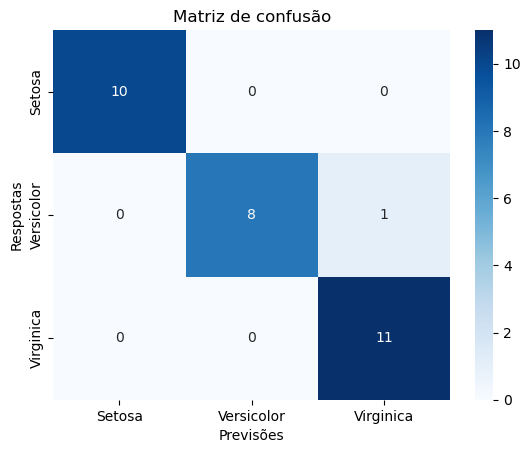

In [ ]:
# Plota matriz de confusão

class_names = ["Setosa", "Versicolor", "Virginica"]
confusionMatrix(true_labels, predictions, class_names )

#### Plano de vetores

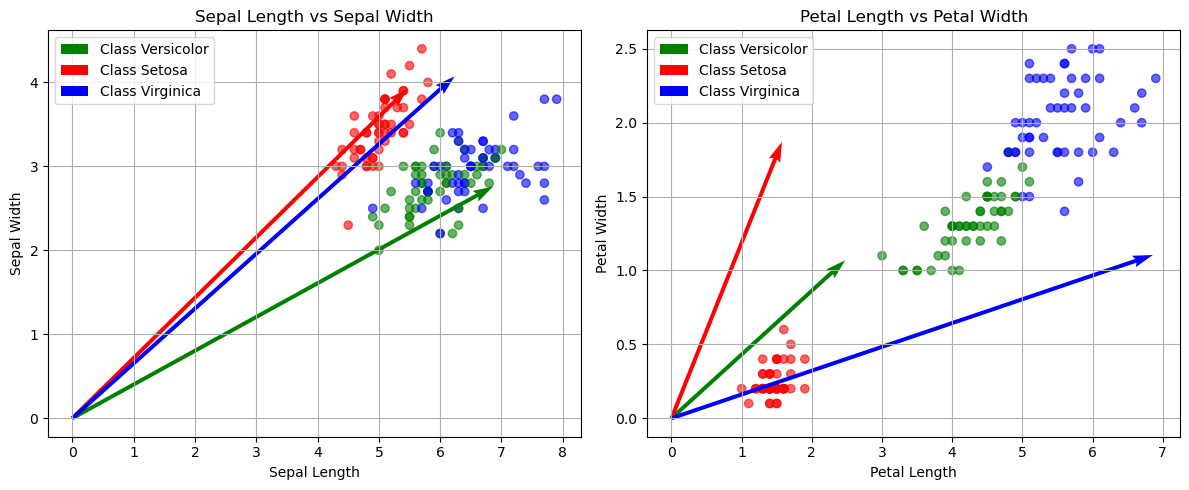

In [48]:
# Plota planos com os vetores

# Junta todos os antigenos (Teste + Treinamento)

all_antigens = antigens_test + antigens

vectorSpace(all_antigens, best_antibody.vectors, best_antibody.labels)